In [ ]:
#install necessary libraries
!pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317130 sha256=e6d40ec4cf8fe6693ed160023673e4f421de1854199e57df8f1edfe84efa3b48
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import nececssary libraries
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler, StandardScaler
from pyspark.ml.clustering import KMeans
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.sql.functions import min, max, avg, stddev
from pyspark.ml.stat import Correlation
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pyspark.sql.functions import rand,col
spark = SparkSession.builder \
        .master('local[*]') \
        .config('spark.executor.memory', '10gb') \
        .config("spark.cores.max", "8") \
        .config("spark.executor.cores", "6") \
        .config("spark.jars.packages", "graphframes:graphframes:0.8.1-spark3.0-s_2.12") \
        .getOrCreate()


In [ ]:
#Read the data
#Change the path 
stress = spark.read.csv("train_data.csv", header=True, inferSchema=True)
stress.show()
stress.count()

+----+----+--------------------+-------------------------+--------------------------+---------------------------+----------------------------+----------------------------+----------------------------+---------------------------+----------------------------+------------------------------+----------------------------+--------------------------+--------------------------+-------------------------+---------------------------+------------------+--------------------------------------+------------+
|User|Time|Active Energy (kcal)|Apple Exercise Time (min)|Basal Energy Burned (kcal)|Blood Oxygen Saturation (%)|Heart Rate [Min] (count/min)|Heart Rate [Max] (count/min)|Heart Rate [Avg] (count/min)|Heart Rate Variability (ms)|Respiratory Rate (count/min)|Resting Heart Rate (count/min)|Sleep Analysis [In Bed] (hr)|Sleep Analysis [Core] (hr)|Sleep Analysis [Deep] (hr)|Sleep Analysis [REM] (hr)|Sleep Analysis [Awake] (hr)|Step Count (count)|Walking Heart Rate Average (count/min)|Stress Level|
+----+

64620

In [ ]:
#Find the min,max, avg, of features group by user
stress_grouped = stress.groupBy("User").agg(min("Stress Level").alias("StressLevel"),min("Active Energy (kcal)").alias("min_Active Energy (kcal)"),
                                        max("Active Energy (kcal)").alias("max_Active Energy (kcal)"),
                                        avg("Active Energy (kcal)").alias("avg_Active Energy (kcal)"),
                                        stddev("Active Energy (kcal)").alias("stddev_Active Energy (kcal)"),
                                        min("Apple Exercise Time (min)").alias("min_Apple Exercise Time (min)"),
                                        max("Apple Exercise Time (min)").alias("max_Apple Exercise Time (min)"),
                                        avg("Apple Exercise Time (min)").alias("avg_Apple Exercise Time (min)"),
                                        stddev("Apple Exercise Time (min)").alias("stddev_Apple Exercise Time (min)"),
                                        min("Basal Energy Burned (kcal)").alias("min_Basal Energy Burned (kcal)"),
                                        max("Basal Energy Burned (kcal)").alias("max_Basal Energy Burned (kcal)"),
                                        avg("Basal Energy Burned (kcal)").alias("avg_Basal Energy Burned (kcal)"),
                                        stddev("Basal Energy Burned (kcal)").alias("stddev_Basal Energy Burned (kcal)"),
                                        min("Blood Oxygen Saturation (%)").alias("min_Blood Oxygen Saturation (%)"),
                                        max("Blood Oxygen Saturation (%)").alias("max_Blood Oxygen Saturation (%)"),
                                        avg("Blood Oxygen Saturation (%)").alias("avg_Blood Oxygen Saturation (%)"),
                                        stddev("Blood Oxygen Saturation (%)").alias("stddev_Blood Oxygen Saturation (%)"),
                                        min("Heart Rate [Min] (count/min)").alias("min_Heart Rate [Min] (count/min)"),
                                        max("Heart Rate [Min] (count/min)").alias("max_Heart Rate [Min] (count/min)"),
                                        avg("Heart Rate [Min] (count/min)").alias("avg_Heart Rate [Min] (count/min)"),
                                        stddev("Heart Rate [Min] (count/min)").alias("stddev_Heart Rate [Min] (count/min)"),
                                        min("Heart Rate [Max] (count/min)").alias("min_Heart Rate [Max] (count/min)"),
                                        max("Heart Rate [Max] (count/min)").alias("max_Heart Rate [Max] (count/min)"),
                                        avg("Heart Rate [Max] (count/min)").alias("avg_Heart Rate [Max] (count/min)"),
                                        stddev("Heart Rate [Max] (count/min)").alias("stddev_Heart Rate [Max] (count/min)"),
                                        min("Heart Rate [Avg] (count/min)").alias("min_Heart Rate [Avg] (count/min)"),
                                        max("Heart Rate [Avg] (count/min)").alias("max_Heart Rate [Avg] (count/min)"),
                                        avg("Heart Rate [Avg] (count/min)").alias("avg_Heart Rate [Avg] (count/min)"),
                                        stddev("Heart Rate [Avg] (count/min)").alias("stddev_Heart Rate [Avg] (count/min)"),
                                        min("Heart Rate Variability (ms)").alias("min_Heart Rate Variability (ms)"),
                                        max("Heart Rate Variability (ms)").alias("max_Heart Rate Variability (ms)"),
                                        avg("Heart Rate Variability (ms)").alias("avg_Heart Rate Variability (ms)"),
                                        stddev("Heart Rate Variability (ms)").alias("stddev_Heart Rate Variability (ms)"),
                                        min("Respiratory Rate (count/min)").alias("min_Respiratory Rate (count/min)"),
                                        max("Respiratory Rate (count/min)").alias("max_Respiratory Rate (count/min)"),
                                        avg("Respiratory Rate (count/min)").alias("avg_Respiratory Rate (count/min)"),
                                        stddev("Respiratory Rate (count/min)").alias("stddev_Respiratory Rate (count/min)"),
                                        min("Resting Heart Rate (count/min)").alias("min_Resting Heart Rate (count/min)"),
                                        max("Resting Heart Rate (count/min)").alias("max_Resting Heart Rate (count/min)"),
                                        avg("Resting Heart Rate (count/min)").alias("avg_Resting Heart Rate (count/min)"),
                                        stddev("Resting Heart Rate (count/min)").alias("stddev_Resting Heart Rate (count/min)"),                        
                                        min("Sleep Analysis [In Bed] (hr)").alias("min_Sleep Analysis [In Bed] (hr)"),
                                        max("Sleep Analysis [In Bed] (hr)").alias("max_Sleep Analysis [In Bed] (hr)"),
                                        avg("Sleep Analysis [In Bed] (hr)").alias("avg_Sleep Analysis [In Bed] (hr)"),
                                        stddev("Sleep Analysis [In Bed] (hr)").alias("stddev_Sleep Analysis [In Bed] (hr)"),
                                        min("Sleep Analysis [Core] (hr)").alias("min_Sleep Analysis [Core] (hr)"),
                                        max("Sleep Analysis [Core] (hr)").alias("max_Sleep Analysis [Core] (hr)"),
                                        avg("Sleep Analysis [Core] (hr)").alias("avg_Sleep Analysis [Core] (hr)"),
                                        stddev("Sleep Analysis [Core] (hr)").alias("stddev_Sleep Analysis [Core] (hr)"),
                                        min("Sleep Analysis [Deep] (hr)").alias("min_Sleep Analysis [Deep] (hr)"),
                                        max("Sleep Analysis [Deep] (hr)").alias("max_Sleep Analysis [Deep] (hr)"),
                                        avg("Sleep Analysis [Deep] (hr)").alias("avg_Sleep Analysis [Deep] (hr)"),
                                        stddev("Sleep Analysis [Deep] (hr)").alias("stddev_Sleep Analysis [Deep] (hr)"),
                                        min("Sleep Analysis [REM] (hr)").alias("min_Sleep Analysis [REM] (hr)"),
                                        max("Sleep Analysis [REM] (hr)").alias("max_Sleep Analysis [REM] (hr)"),
                                        avg("Sleep Analysis [REM] (hr)").alias("avg_Sleep Analysis [REM] (hr)"),
                                        stddev("Sleep Analysis [REM] (hr)").alias("stddev_Sleep Analysis [REM] (hr)"),
                                        min("Sleep Analysis [Awake] (hr)").alias("min_Sleep Analysis [Awake] (hr)"),
                                        max("Sleep Analysis [Awake] (hr)").alias("max_Sleep Analysis [Awake] (hr)"),
                                        avg("Sleep Analysis [Awake] (hr)").alias("avg_Sleep Analysis [Awake] (hr)"),
                                        stddev("Sleep Analysis [Awake] (hr)").alias("stddev_Sleep Analysis [Awake] (hr)"),
                                        min("Step Count (count)").alias("min_Step Count (count)"),
                                        max("Step Count (count)").alias("max_Step Count (count)"),
                                        avg("Step Count (count)").alias("avg_Step Count (count)"),
                                        stddev("Step Count (count)").alias("stddev_Step Count (count)"),
                                        min("Walking Heart Rate Average (count/min)").alias("min_Walking Heart Rate Average (count/min)"),
                                        max("Walking Heart Rate Average (count/min)").alias("max_Walking Heart Rate Average (count/min)"),
                                        avg("Walking Heart Rate Average (count/min)").alias("avg_Walking Heart Rate Average (count/min)"),
                                        stddev("Walking Heart Rate Average (count/min)").alias("stddev_Walking Heart Rate Average (count/min)")).sort("User")




In [ ]:
#Capture stress Level group by user
stress_user = stress.groupBy("User").agg(min("Stress Level").alias("StressLevel"))


## EDA

In [ ]:
stress_grouped_plot = stress_grouped.select(['User','StressLevel','min_Blood Oxygen Saturation (%)',
    'max_Blood Oxygen Saturation (%)',
 'avg_Heart Rate Variability (ms)',
  'avg_Respiratory Rate (count/min)',
 'avg_Sleep Analysis [Deep] (hr)',
 'avg_Sleep Analysis [REM] (hr)',
 'avg_Step Count (count)',
 'avg_Walking Heart Rate Average (count/min)'
])
stress_grouped_plot.show()

+----+-----------+-------------------------------+-------------------------------+-------------------------------+--------------------------------+------------------------------+-----------------------------+----------------------+------------------------------------------+
|User|StressLevel|min_Blood Oxygen Saturation (%)|max_Blood Oxygen Saturation (%)|avg_Heart Rate Variability (ms)|avg_Respiratory Rate (count/min)|avg_Sleep Analysis [Deep] (hr)|avg_Sleep Analysis [REM] (hr)|avg_Step Count (count)|avg_Walking Heart Rate Average (count/min)|
+----+-----------+-------------------------------+-------------------------------+-------------------------------+--------------------------------+------------------------------+-----------------------------+----------------------+------------------------------------------+
|   1|          0|                     68.5046664|                    99.20136359|              72.01768323866665|               19.76750648988889|            0.83883873344444

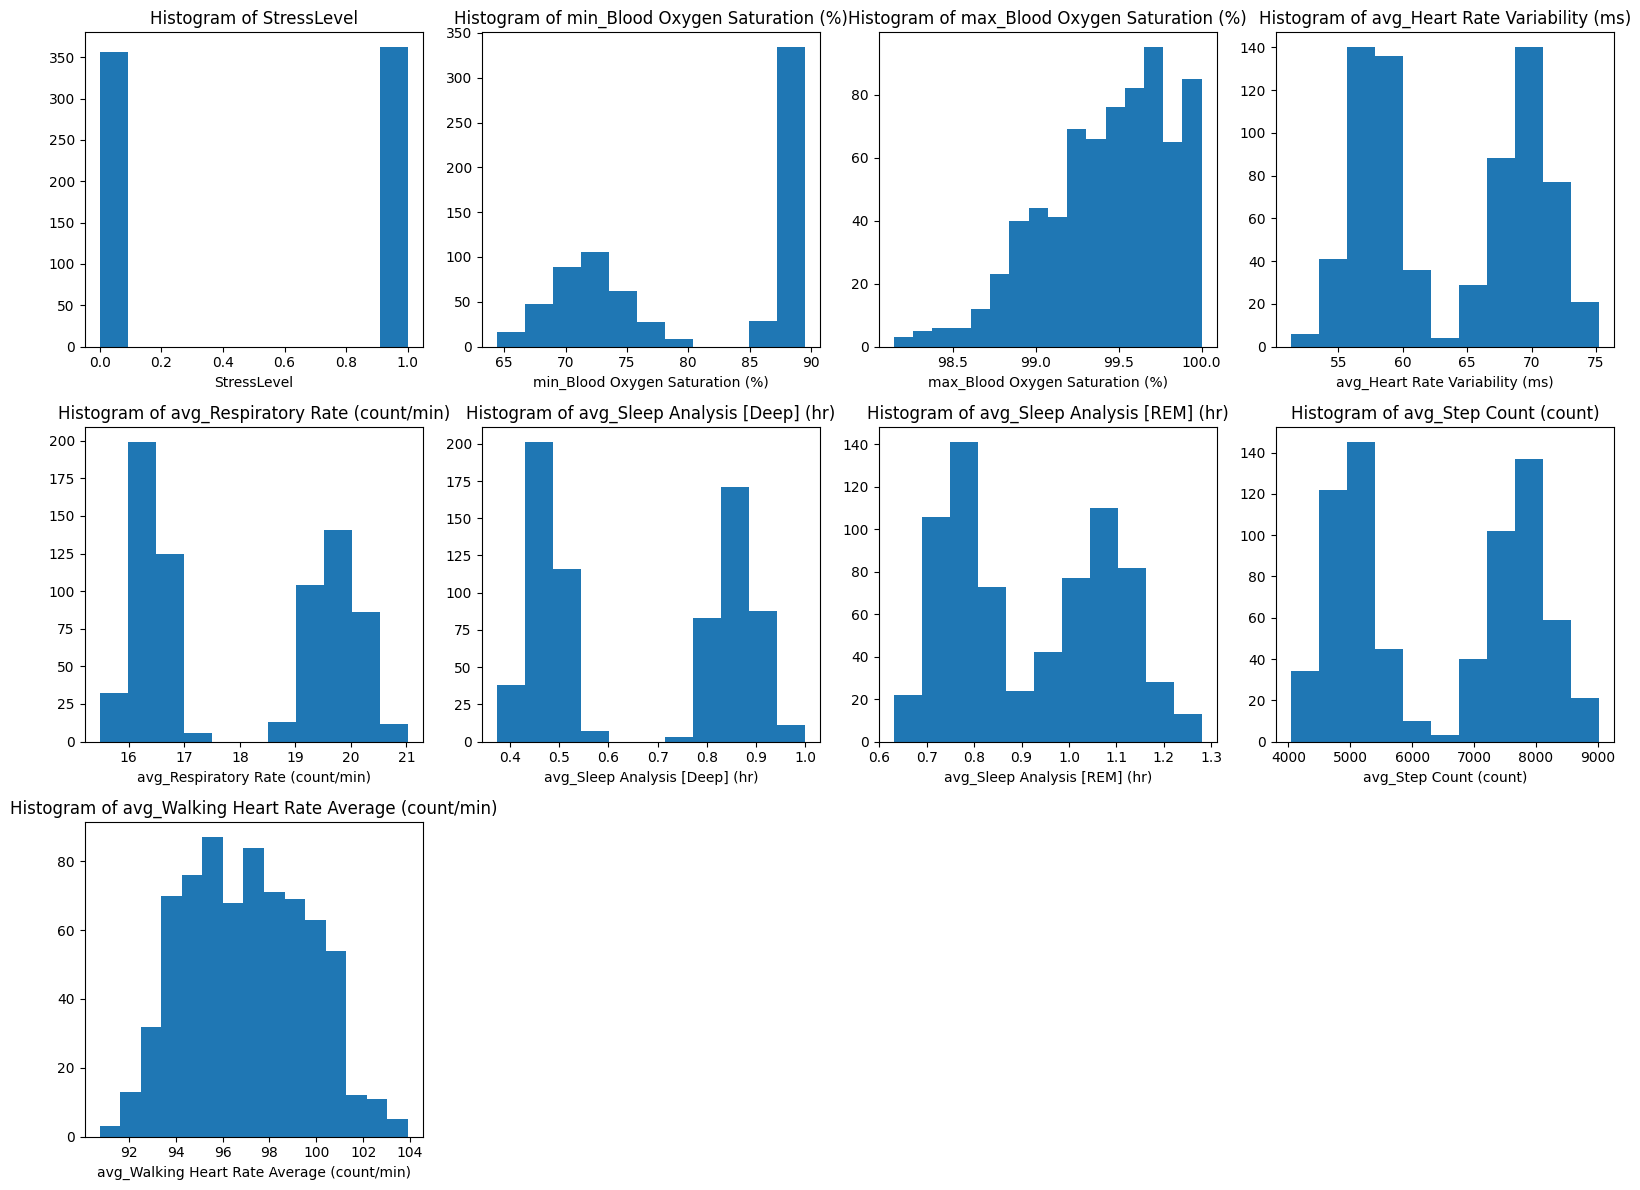

In [ ]:
# Convert the filtered DataFrame to a Pandas DataFrame
pandas_df = stress_grouped_plot.toPandas()

# Get the list of variables
variables = pandas_df.columns[1:]  # Exclude the 'Stress Level' column

# Define the number of histograms per row and column
num_histograms_per_row = 3
num_histograms_per_col = 4

# Calculate the number of rows and columns for subplots
num_rows = num_histograms_per_row
num_cols = num_histograms_per_col

# Create subplots with the specified number of rows and columns
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(16, 12))

# Iterate over variables and plot histograms
for i, variable in enumerate(variables):
    row = i // num_histograms_per_col
    col = i % num_histograms_per_col
    axes[row, col].hist(pandas_df[variable], bins='auto')
    axes[row, col].set_title(f'Histogram of {variable}')
    axes[row, col].set_xlabel(variable)
    
# Remove empty subplots if the number of variables is less than the number of subplots
if len(variables) < num_histograms_per_row * num_histograms_per_col:
    for i in range(len(variables), num_histograms_per_row * num_histograms_per_col):
        row = i // num_histograms_per_col
        col = i % num_histograms_per_col
        fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

In [ ]:
cor_df = stress_grouped.select(['min_Blood Oxygen Saturation (%)',
    'max_Blood Oxygen Saturation (%)',
 'avg_Heart Rate Variability (ms)',
 'min_Respiratory Rate (count/min)',
 'max_Respiratory Rate (count/min)',
 'avg_Sleep Analysis [Deep] (hr)',
 'avg_Sleep Analysis [REM] (hr)',
 'avg_Step Count (count)',
 'avg_Walking Heart Rate Average (count/min)'
])
cor_df.show()

+-------------------------------+-------------------------------+-------------------------------+--------------------------------+--------------------------------+------------------------------+-----------------------------+----------------------+------------------------------------------+
|min_Blood Oxygen Saturation (%)|max_Blood Oxygen Saturation (%)|avg_Heart Rate Variability (ms)|min_Respiratory Rate (count/min)|max_Respiratory Rate (count/min)|avg_Sleep Analysis [Deep] (hr)|avg_Sleep Analysis [REM] (hr)|avg_Step Count (count)|avg_Walking Heart Rate Average (count/min)|
+-------------------------------+-------------------------------+-------------------------------+--------------------------------+--------------------------------+------------------------------+-----------------------------+----------------------+------------------------------------------+
|                     68.5046664|                    99.20136359|              72.01768323866665|                     12.285391

In [ ]:
# Assemble the features into a vector column
assembler = VectorAssembler(inputCols=cor_df.columns[:-1], outputCol="features")
vectorized_data = assembler.transform(cor_df).select("features")

# Calculate the correlation matrix
corr_matrix = Correlation.corr(vectorized_data, "features").head()

# Extract the correlation matrix as a NumPy array
correlations = corr_matrix[0].toArray()

# Get the column names
columns = cor_df.columns[:-1]

# Find values with correlation greater than 0.4
threshold = 0.6
correlated_values = []
for i in range(len(correlations)):
    for j in range(i + 1, len(correlations)):
        if abs(correlations[i][j]) > threshold:
            correlated_values.append((columns[i], columns[j], correlations[i][j]))

# Print the correlated values
print("Correlated Values (Correlation > 0.6):")
for value in correlated_values:
    print(value)


Correlated Values (Correlation > 0.6):
('min_Blood Oxygen Saturation (%)', 'avg_Heart Rate Variability (ms)', -0.906371155812176)
('min_Blood Oxygen Saturation (%)', 'max_Respiratory Rate (count/min)', -0.8195663280109204)
('min_Blood Oxygen Saturation (%)', 'avg_Sleep Analysis [Deep] (hr)', -0.9478204747757804)
('min_Blood Oxygen Saturation (%)', 'avg_Sleep Analysis [REM] (hr)', -0.8713585762228087)
('min_Blood Oxygen Saturation (%)', 'avg_Step Count (count)', 0.9189696477780971)
('avg_Heart Rate Variability (ms)', 'max_Respiratory Rate (count/min)', 0.8078187870118865)
('avg_Heart Rate Variability (ms)', 'avg_Sleep Analysis [Deep] (hr)', 0.9234051307656819)
('avg_Heart Rate Variability (ms)', 'avg_Sleep Analysis [REM] (hr)', 0.8699430765802548)
('avg_Heart Rate Variability (ms)', 'avg_Step Count (count)', -0.9078492578738729)
('max_Respiratory Rate (count/min)', 'avg_Sleep Analysis [Deep] (hr)', 0.8383204958628526)
('max_Respiratory Rate (count/min)', 'avg_Sleep Analysis [REM] (hr)',

## Modelling

In [ ]:
#Assemble all features
vector_assembler = VectorAssembler(inputCols=[
    'min_Blood Oxygen Saturation (%)',
    'max_Blood Oxygen Saturation (%)',
 'avg_Heart Rate Variability (ms)',
 'avg_Respiratory Rate (count/min)',
 'avg_Sleep Analysis [Deep] (hr)',
 'avg_Sleep Analysis [REM] (hr)',
 'avg_Step Count (count)',
 'avg_Walking Heart Rate Average (count/min)'
], outputCol="features")

df_transformed = vector_assembler.transform(stress_grouped)
finalData = df_transformed.select('features', 'StressLevel')
shuffled_data = finalData.orderBy(rand())
shuffled_data.show()

+--------------------+-----------+
|            features|StressLevel|
+--------------------+-----------+
|[88.02966705,99.6...|          1|
|[70.12493844,99.8...|          0|
|[87.68086688,99.0...|          1|
|[72.65149815,99.3...|          0|
|[87.58481366,99.7...|          1|
|[70.75465917,98.9...|          0|
|[88.8103793,99.30...|          1|
|[87.26577383,99.7...|          1|
|[87.78968761,99.6...|          1|
|[68.0522704,99.75...|          0|
|[88.51606709,99.6...|          1|
|[71.0678349,99.46...|          0|
|[74.72266689,99.7...|          0|
|[70.63503773,99.6...|          0|
|[69.83633073,99.2...|          0|
|[66.17504761,98.8...|          0|
|[87.93664484,99.0...|          1|
|[67.17643069,99.5...|          0|
|[87.71031584,98.6...|          1|
|[88.16485038,99.5...|          1|
+--------------------+-----------+
only showing top 20 rows



In [ ]:
##Load Test data and perform similar actions as above
stress_test = spark.read.csv("test_user.csv", header=True, inferSchema=True)



stress_test_grouped = stress_test.groupBy("User").agg(min("Stress Level").alias("StressLevel"),min("Active Energy (kcal)").alias("min_Active Energy (kcal)"),
                                        max("Active Energy (kcal)").alias("max_Active Energy (kcal)"),
                                        avg("Active Energy (kcal)").alias("avg_Active Energy (kcal)"),
                                        stddev("Active Energy (kcal)").alias("stddev_Active Energy (kcal)"),
                                        min("Apple Exercise Time (min)").alias("min_Apple Exercise Time (min)"),
                                        max("Apple Exercise Time (min)").alias("max_Apple Exercise Time (min)"),
                                        avg("Apple Exercise Time (min)").alias("avg_Apple Exercise Time (min)"),
                                        stddev("Apple Exercise Time (min)").alias("stddev_Apple Exercise Time (min)"),
                                        min("Basal Energy Burned (kcal)").alias("min_Basal Energy Burned (kcal)"),
                                        max("Basal Energy Burned (kcal)").alias("max_Basal Energy Burned (kcal)"),
                                        avg("Basal Energy Burned (kcal)").alias("avg_Basal Energy Burned (kcal)"),
                                        stddev("Basal Energy Burned (kcal)").alias("stddev_Basal Energy Burned (kcal)"),
                                        min("Blood Oxygen Saturation (%)").alias("min_Blood Oxygen Saturation (%)"),
                                        max("Blood Oxygen Saturation (%)").alias("max_Blood Oxygen Saturation (%)"),
                                        avg("Blood Oxygen Saturation (%)").alias("avg_Blood Oxygen Saturation (%)"),
                                        stddev("Blood Oxygen Saturation (%)").alias("stddev_Blood Oxygen Saturation (%)"),
                                        min("Heart Rate [Min] (count/min)").alias("min_Heart Rate [Min] (count/min)"),
                                        max("Heart Rate [Min] (count/min)").alias("max_Heart Rate [Min] (count/min)"),
                                        avg("Heart Rate [Min] (count/min)").alias("avg_Heart Rate [Min] (count/min)"),
                                        stddev("Heart Rate [Min] (count/min)").alias("stddev_Heart Rate [Min] (count/min)"),
                                        min("Heart Rate [Max] (count/min)").alias("min_Heart Rate [Max] (count/min)"),
                                        max("Heart Rate [Max] (count/min)").alias("max_Heart Rate [Max] (count/min)"),
                                        avg("Heart Rate [Max] (count/min)").alias("avg_Heart Rate [Max] (count/min)"),
                                        stddev("Heart Rate [Max] (count/min)").alias("stddev_Heart Rate [Max] (count/min)"),
                                        min("Heart Rate [Avg] (count/min)").alias("min_Heart Rate [Avg] (count/min)"),
                                        max("Heart Rate [Avg] (count/min)").alias("max_Heart Rate [Avg] (count/min)"),
                                        avg("Heart Rate [Avg] (count/min)").alias("avg_Heart Rate [Avg] (count/min)"),
                                        stddev("Heart Rate [Avg] (count/min)").alias("stddev_Heart Rate [Avg] (count/min)"),
                                        min("Heart Rate Variability (ms)").alias("min_Heart Rate Variability (ms)"),
                                        max("Heart Rate Variability (ms)").alias("max_Heart Rate Variability (ms)"),
                                        avg("Heart Rate Variability (ms)").alias("avg_Heart Rate Variability (ms)"),
                                        stddev("Heart Rate Variability (ms)").alias("stddev_Heart Rate Variability (ms)"),
                                        min("Respiratory Rate (count/min)").alias("min_Respiratory Rate (count/min)"),
                                        max("Respiratory Rate (count/min)").alias("max_Respiratory Rate (count/min)"),
                                        avg("Respiratory Rate (count/min)").alias("avg_Respiratory Rate (count/min)"),
                                        stddev("Respiratory Rate (count/min)").alias("stddev_Respiratory Rate (count/min)"),
                                        min("Resting Heart Rate (count/min)").alias("min_Resting Heart Rate (count/min)"),
                                        max("Resting Heart Rate (count/min)").alias("max_Resting Heart Rate (count/min)"),
                                        avg("Resting Heart Rate (count/min)").alias("avg_Resting Heart Rate (count/min)"),
                                        stddev("Resting Heart Rate (count/min)").alias("stddev_Resting Heart Rate (count/min)"),                        
                                        min("Sleep Analysis [In Bed] (hr)").alias("min_Sleep Analysis [In Bed] (hr)"),
                                        max("Sleep Analysis [In Bed] (hr)").alias("max_Sleep Analysis [In Bed] (hr)"),
                                        avg("Sleep Analysis [In Bed] (hr)").alias("avg_Sleep Analysis [In Bed] (hr)"),
                                        stddev("Sleep Analysis [In Bed] (hr)").alias("stddev_Sleep Analysis [In Bed] (hr)"),
                                        min("Sleep Analysis [Core] (hr)").alias("min_Sleep Analysis [Core] (hr)"),
                                        max("Sleep Analysis [Core] (hr)").alias("max_Sleep Analysis [Core] (hr)"),
                                        avg("Sleep Analysis [Core] (hr)").alias("avg_Sleep Analysis [Core] (hr)"),
                                        stddev("Sleep Analysis [Core] (hr)").alias("stddev_Sleep Analysis [Core] (hr)"),
                                        min("Sleep Analysis [Deep] (hr)").alias("min_Sleep Analysis [Deep] (hr)"),
                                        max("Sleep Analysis [Deep] (hr)").alias("max_Sleep Analysis [Deep] (hr)"),
                                        avg("Sleep Analysis [Deep] (hr)").alias("avg_Sleep Analysis [Deep] (hr)"),
                                        stddev("Sleep Analysis [Deep] (hr)").alias("stddev_Sleep Analysis [Deep] (hr)"),
                                        min("Sleep Analysis [REM] (hr)").alias("min_Sleep Analysis [REM] (hr)"),
                                        max("Sleep Analysis [REM] (hr)").alias("max_Sleep Analysis [REM] (hr)"),
                                        avg("Sleep Analysis [REM] (hr)").alias("avg_Sleep Analysis [REM] (hr)"),
                                        stddev("Sleep Analysis [REM] (hr)").alias("stddev_Sleep Analysis [REM] (hr)"),
                                        min("Sleep Analysis [Awake] (hr)").alias("min_Sleep Analysis [Awake] (hr)"),
                                        max("Sleep Analysis [Awake] (hr)").alias("max_Sleep Analysis [Awake] (hr)"),
                                        avg("Sleep Analysis [Awake] (hr)").alias("avg_Sleep Analysis [Awake] (hr)"),
                                        stddev("Sleep Analysis [Awake] (hr)").alias("stddev_Sleep Analysis [Awake] (hr)"),
                                        min("Step Count (count)").alias("min_Step Count (count)"),
                                        max("Step Count (count)").alias("max_Step Count (count)"),
                                        avg("Step Count (count)").alias("avg_Step Count (count)"),
                                        stddev("Step Count (count)").alias("stddev_Step Count (count)"),
                                        min("Walking Heart Rate Average (count/min)").alias("min_Walking Heart Rate Average (count/min)"),
                                        max("Walking Heart Rate Average (count/min)").alias("max_Walking Heart Rate Average (count/min)"),
                                        avg("Walking Heart Rate Average (count/min)").alias("avg_Walking Heart Rate Average (count/min)"),
                                        stddev("Walking Heart Rate Average (count/min)").alias("stddev_Walking Heart Rate Average (count/min)")).sort("User")




In [ ]:
# Replace null values with 0
stress_test_grouped_t = stress_test_grouped.fillna(0, subset=[
    'min_Blood Oxygen Saturation (%)',
    'max_Blood Oxygen Saturation (%)',
 'avg_Heart Rate Variability (ms)',
 'avg_Respiratory Rate (count/min)',
 'avg_Sleep Analysis [Deep] (hr)',
 'avg_Sleep Analysis [REM] (hr)',
 'avg_Step Count (count)',
 'avg_Walking Heart Rate Average (count/min)',])

# Display the DataFrame with null values replaced by 0
stress_test_grouped_t.show()


+----+-----------+------------------------+------------------------+------------------------+---------------------------+-----------------------------+-----------------------------+-----------------------------+--------------------------------+------------------------------+------------------------------+------------------------------+---------------------------------+-------------------------------+-------------------------------+-------------------------------+----------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------------+--------------------------------+--------------------------------+--------------------------------+-----------------------------------+-------------------------------+-------------------------------+-----------------------------

In [ ]:
#Assemble the data
vector_assembler2 = VectorAssembler(inputCols=[
    'min_Blood Oxygen Saturation (%)',
    'max_Blood Oxygen Saturation (%)',
  # 'avg_Blood Oxygen Saturation (%)',
 'avg_Heart Rate Variability (ms)',
#  'stddev_Heart Rate Variability (ms)',
 'avg_Respiratory Rate (count/min)',
 'avg_Sleep Analysis [Deep] (hr)',
 'avg_Sleep Analysis [REM] (hr)',
 'avg_Step Count (count)',
 'avg_Walking Heart Rate Average (count/min)'
 ], outputCol="features")

df_test_transformed = vector_assembler2.transform(stress_test_grouped_t)
final_test = df_test_transformed.select('features', 'StressLevel')

## Logistic Regression

In [ ]:
# Create a LogisticRegression model
lr = LogisticRegression(featuresCol="features", labelCol="StressLevel")

# Fit the model to the training data
lr_model = lr.fit(shuffled_data)

# Make predictions on the test features
predictions = lr_model.transform(final_test)

# # Create a BinaryClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="StressLevel", predictionCol="prediction", metricName="accuracy")

# # # Calculate the accuracy
accuracy = evaluator.evaluate(predictions)
predictions.show()
# # # Print the accuracy
print("Accuracy:", accuracy)
# Compute precision, recall, and confusion matrix
labels = predictions.select('StressLevel').distinct().orderBy('StressLevel').rdd.flatMap(lambda x: x).collect()
num_labels = len(labels)
confusion_matrix = predictions.groupBy('StressLevel').pivot('prediction', labels).count().na.fill(0).orderBy('StressLevel').toPandas()
confusion_matrix.rename(columns={'StressLevel': 'True/Predicted'}, inplace=True)
confusion_matrix.set_index('True/Predicted', inplace=True)

# Compute precision and recall
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

print("Precision: ")
print(precision)
print("Recall: ")
print(recall)
print("Confusion Matrix: ")
print(confusion_matrix)

+--------------------+-----------+--------------------+--------------------+----------+
|            features|StressLevel|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|[94.83,100.0,46.8...|          1|[-23.428950585882...|[6.68245501325713...|       1.0|
|[93.0,98.5,51.247...|          0|[4.37673574914109...|[0.98758964109647...|       0.0|
|[79.25,98.62,48.9...|          0|[11.4613997562215...|[0.99998947134831...|       0.0|
|[92.25,100.0,48.6...|          1|[-19.607603351300...|[3.05158913437263...|       1.0|
|[89.0,96.92,64.11...|          1|[-44.541234900646...|[4.52884508666662...|       1.0|
|[86.0,98.33,58.44...|          0|[-6.9141938919659...|[9.92595845035173...|       1.0|
|[89.0,95.88,67.87...|          0|[-54.199953428281...|[2.89240635246126...|       1.0|
|[87.06,100.0,46.5...|          1|[-33.168046389979...|[3.93822456972628...|       1.0|
|[96.0,100.0,35.79...|          

# Ridge + Logistic Regression

In [ ]:
# Create a LogisticRegression model with Ridge regularization
lr = LogisticRegression(featuresCol="features", labelCol="StressLevel", regParam=0.1, elasticNetParam=0.0)

# Fit the model to the training data
lr_model = lr.fit(shuffled_data)

# Make predictions on the test data
predictions = lr_model.transform(final_test)

# Create a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="StressLevel", predictionCol="prediction", metricName="accuracy")

# Calculate the accuracy
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Accuracy:", accuracy)
predictions.show()
# Compute precision, recall, and confusion matrix
labels = predictions.select('StressLevel').distinct().orderBy('StressLevel').rdd.flatMap(lambda x: x).collect()
num_labels = len(labels)
confusion_matrix = predictions.groupBy('StressLevel').pivot('prediction', labels).count().na.fill(0).orderBy('StressLevel').toPandas()
confusion_matrix.rename(columns={'StressLevel': 'True/Predicted'}, inplace=True)
confusion_matrix.set_index('True/Predicted', inplace=True)

# Compute precision and recall
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

print("Precision: ")
print(precision)
print("Recall: ")
print(recall)
print("Confusion Matrix: ")
print(confusion_matrix)

features : 0.058783996118296225
StressLevel : -0.0672640439277916
Accuracy: 0.7272727272727273
+--------------------+-----------+--------------------+--------------------+----------+
|            features|StressLevel|       rawPrediction|         probability|prediction|
+--------------------+-----------+--------------------+--------------------+----------+
|[94.83,100.0,46.8...|          1|[-2.8010773479239...|[0.05726598580552...|       1.0|
|[93.0,98.5,51.247...|          0|[1.24675087508936...|[0.77673691539041...|       0.0|
|[79.25,98.62,48.9...|          0|[2.14330660374519...|[0.89504164577618...|       0.0|
|[92.25,100.0,48.6...|          1|[-2.5736081837155...|[0.07085638842744...|       1.0|
|[89.0,96.92,64.11...|          1|[-6.1457716458845...|[0.00213794139915...|       1.0|
|[86.0,98.33,58.44...|          0|[-1.2319923954031...|[0.22583290019118...|       1.0|
|[89.0,95.88,67.87...|          0|[-7.8346227628663...|[3.95635005051612...|       1.0|
|[87.06,100.0,46.5...|   

## Scaling + Ridge Logistic

In [ ]:
# Create a StandardScaler transformer
scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")

# Create a LogisticRegression model with Ridge regularization
lr = LogisticRegression(featuresCol="scaledFeatures", labelCol="StressLevel", regParam=0.1, elasticNetParam=0.0)

# Create a pipeline for data preprocessing and model training
pipeline = Pipeline(stages=[scaler, lr])

# Fit the pipeline to the training data
pipeline_model = pipeline.fit(shuffled_data)

# Transform the test data using the pipeline
final_test_scaled = pipeline_model.transform(final_test)

# Make predictions on the scaled test data
predictions = final_test_scaled.select("StressLevel", "prediction")

# Create a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="StressLevel", predictionCol="prediction", metricName="accuracy")

# Calculate the accuracy
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Accuracy:", accuracy)
# Compute precision, recall, and confusion matrix
labels = predictions.select('StressLevel').distinct().orderBy('StressLevel').rdd.flatMap(lambda x: x).collect()
num_labels = len(labels)
confusion_matrix = predictions.groupBy('StressLevel').pivot('prediction', labels).count().na.fill(0).orderBy('StressLevel').toPandas()
confusion_matrix.rename(columns={'StressLevel': 'True/Predicted'}, inplace=True)
confusion_matrix.set_index('True/Predicted', inplace=True)

# Compute precision and recall
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

print("Precision: ")
print(precision)
print("Recall: ")
print(recall)
print("Confusion Matrix: ")
print(confusion_matrix)

Accuracy: 0.7272727272727273
Precision: 
0    0.666667
1    0.750000
dtype: float64
Recall: 
True/Predicted
0    0.500000
1    0.857143
dtype: float64
Confusion Matrix: 
                0  1
True/Predicted      
0               2  2
1               1  6


# Random Forest

In [ ]:
#Random Forest
from pyspark.ml.classification import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(featuresCol="features", labelCol="StressLevel")

# Fit the model to the training data
rf_model = rf.fit(shuffled_data)

# Make predictions on the test data
predictions = rf_model.transform(final_test)

# Create a MulticlassClassificationEvaluator
evaluator = MulticlassClassificationEvaluator(labelCol="StressLevel", predictionCol="prediction", metricName="accuracy")

# Calculate the accuracy
accuracy = evaluator.evaluate(predictions)

# Print the accuracy
print("Accuracy:", accuracy)
# Compute precision, recall, and confusion matrix
labels = predictions.select('StressLevel').distinct().orderBy('StressLevel').rdd.flatMap(lambda x: x).collect()
num_labels = len(labels)
confusion_matrix = predictions.groupBy('StressLevel').pivot('prediction', labels).count().na.fill(0).orderBy('StressLevel').toPandas()
confusion_matrix.rename(columns={'StressLevel': 'True/Predicted'}, inplace=True)
confusion_matrix.set_index('True/Predicted', inplace=True)

# Compute precision and recall
precision = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=0)
recall = np.diag(confusion_matrix) / np.sum(confusion_matrix, axis=1)

print("Precision: ")
print(precision)
print("Recall: ")
print(recall)
print("Confusion Matrix: ")
print(confusion_matrix)